In [2]:
from utils.binaries import *
from utils.plotting import *
from utils.Auger.FD import XYScanner

15:19:41 (   +5.0s) [INFO   ] -- import logging
15:19:41 (  +191ms) [INFO   ] -- import numpy as np
15:19:41 (   +11ms) [INFO   ] -- import uncertainties
15:19:41 (  +401ms) [INFO   ] -- import pandas as pd
15:19:41 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
15:19:41 (    +3ms) [INFO   ] -- import binaries.tools as tools
15:19:42 (  +466ms) [INFO   ] -- import matplotlib.pyplot as plt
15:19:42 (  +615ms) [INFO   ] -- import seaborn as so
15:19:42 (    +3ms) [INFO   ] -- set MONI_PATH = PosixPath('/cr/work/filip/monit_and_sd')
15:19:42 (    +1ms) [INFO   ] -- set HIST_PATH = PosixPath('/cr/work/filip/monit_and_sd')
15:19:42 (    +0ms) [INFO   ] -- set PLOT_PATH = PosixPath('/cr/data01/filip/plots')
15:19:42 (    +1ms) [INFO   ] -- set DATA_PATH = PosixPath('/cr/data01/filip/Data')
15:19:42 (    +2ms) [INFO   ] -- import plotting.tools as plot
15:19:42 (   +14ms) [DEBUG  ] -- font size set to 9.5
15:19:42 (    +1ms) [DEBUG  ] -- label size set to 13.0
15:19:42 ( 

In [39]:
import os

BASE = '/cr/data01/filip/xy-calibration/config/calib_runlists/'

for campaign in os.listdir(BASE):
    if "va" in campaign or "testing" in campaign: continue

    runlist = XYScanner.load_runlist(campaign[11:18])
    if campaign[11:18] == "2024-11": break

In [40]:
# test = XYScanner.get_tel_and_date(runlist, 'he3', '2023-11-09')
test = XYScanner.get_tel_and_date(runlist, 'co5', '2024-11-19')

test

,tel,step,date,source,mA,forDB,jobfile,comment
id,,,,,,,,
16405m23,co5,0,2024-11-19,,0.0,False,,Cal A
16406,co5,0,2024-11-19,,0.0,False,,Cal A open shutter
16407,co5,6,2024-11-19,OLO,15.9,True,job_Coihueco_bay5_hex_s60_r0-1250_cut.txt,
16408,co5,0,2024-11-19,,0.0,False,,Cal A open shutter
16417m23,co5,0,2024-11-19,,0.0,False,,Cal A


Text(0, 0.5, 'Calibration constant / $(\\gamma\\,/\\,\\mathrm{ADC})$')

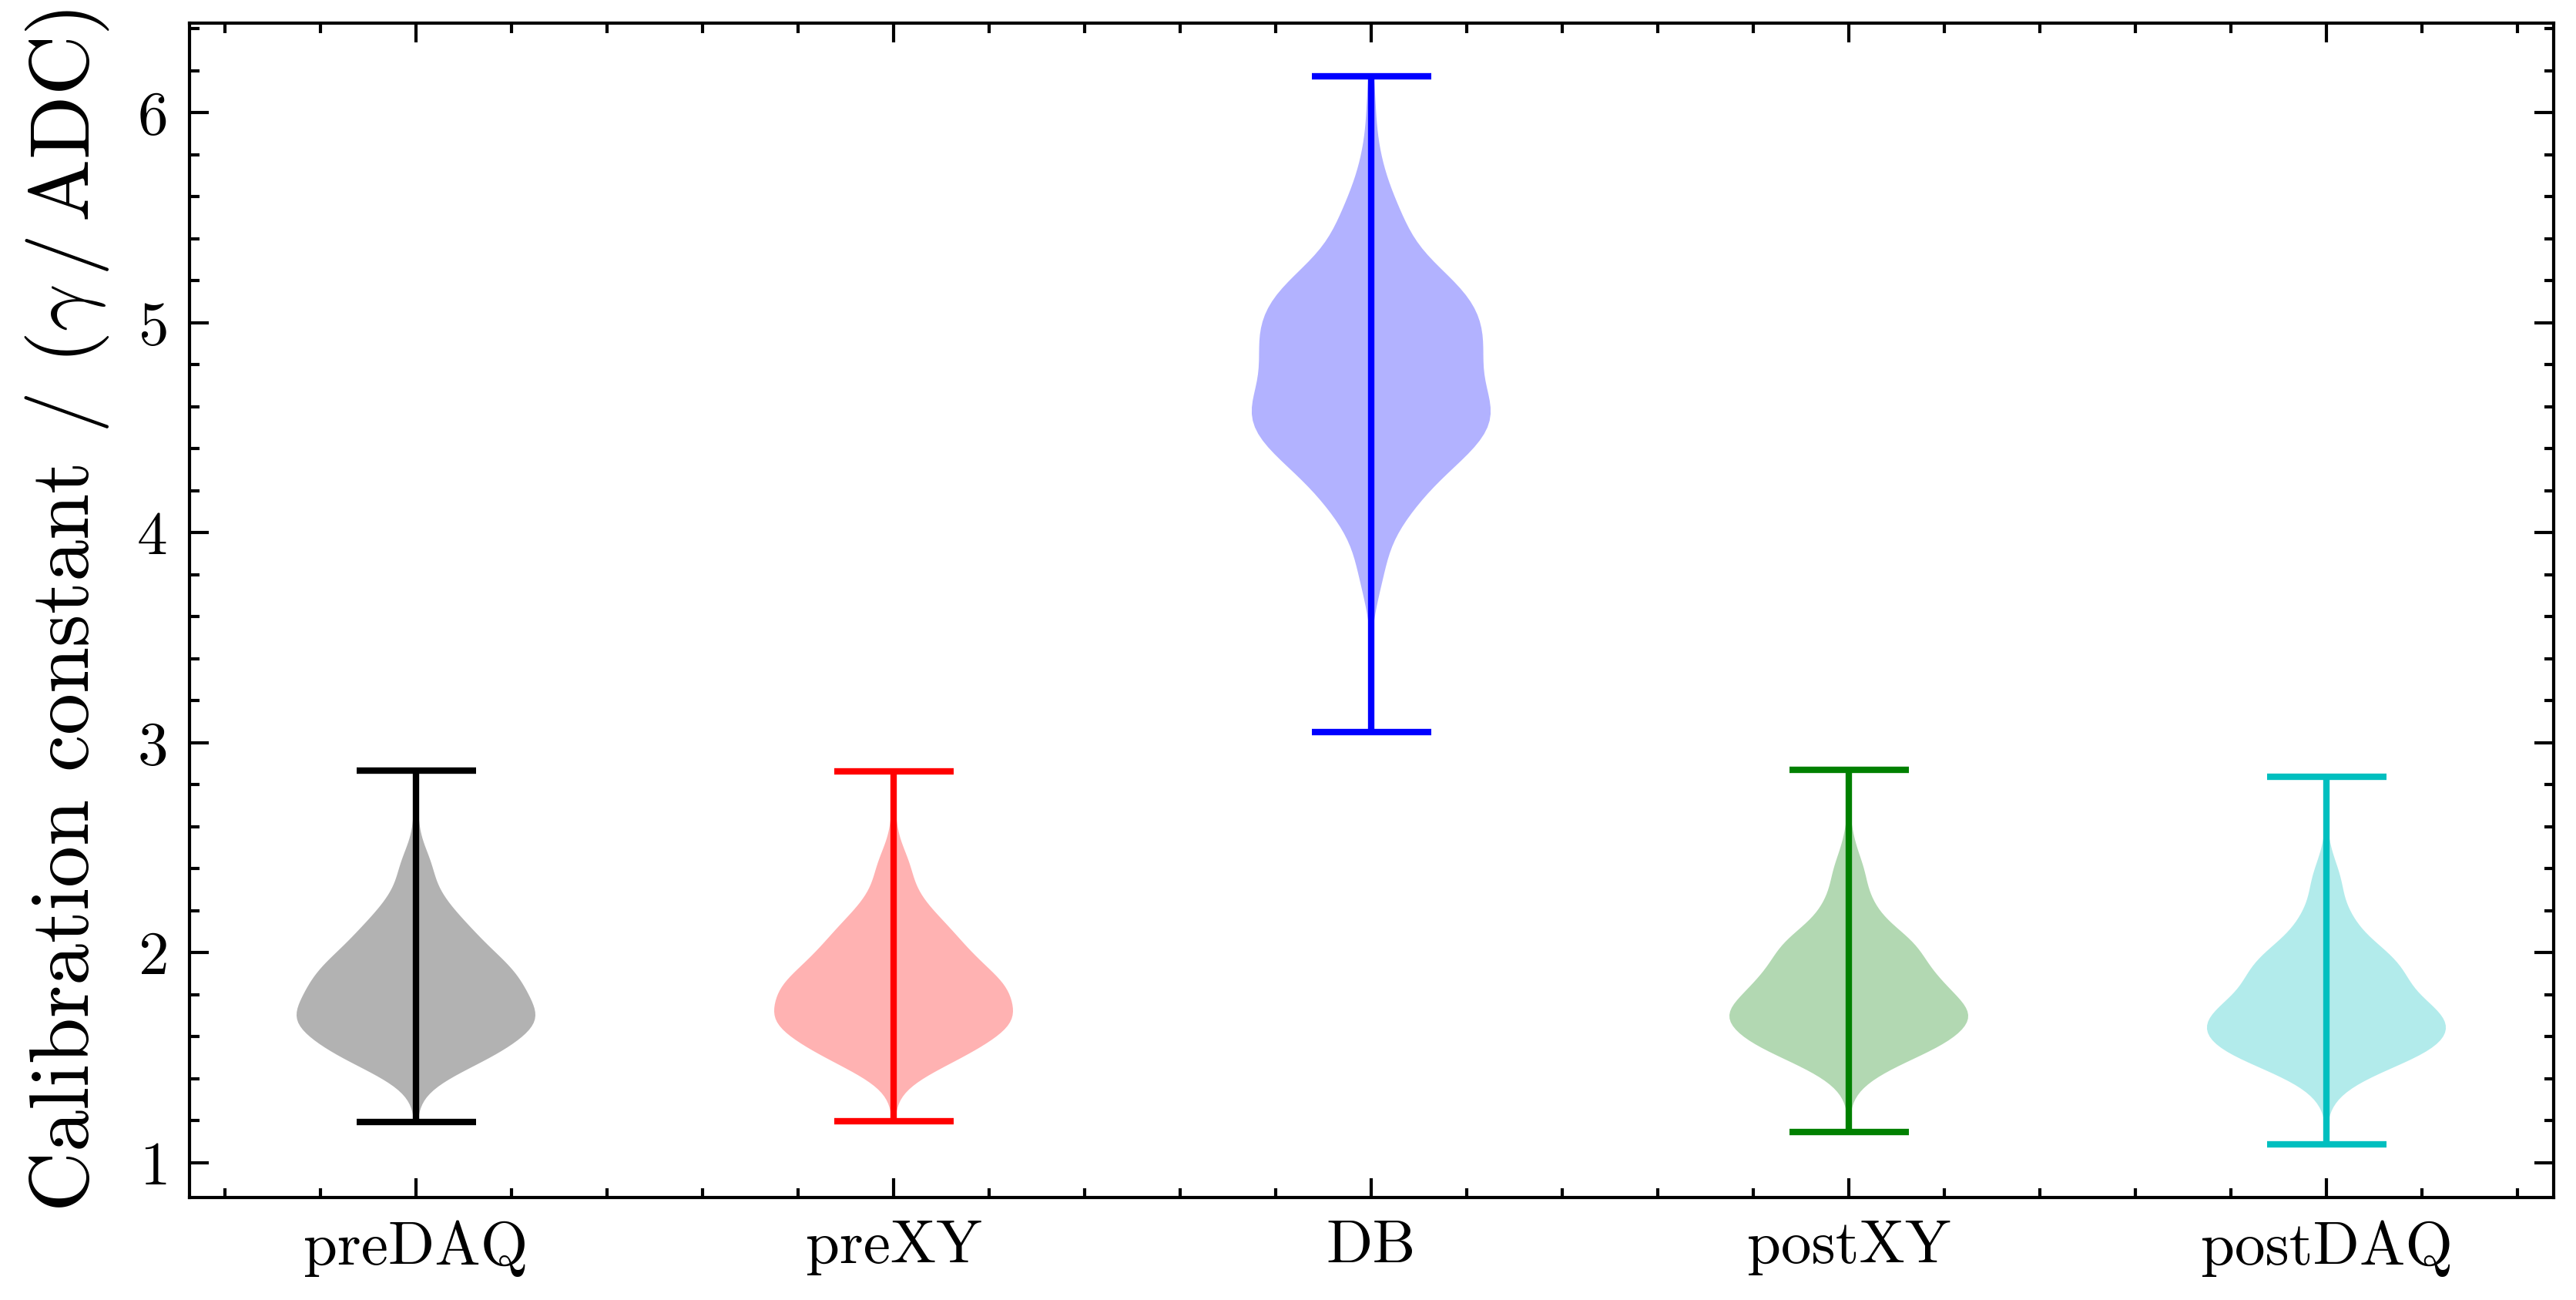

In [43]:
BASE = "/cr/data01/filip/xy-calibration/results/"
skip = 6 - len(test)

for i, (run, info) in enumerate(test.iterrows(), skip):

    if info['forDB']:
        data = np.loadtxt(f"{BASE}/outCorr_{run}.txt", usecols=[3], unpack=True)
    else:
        data = np.loadtxt(f"{BASE}/out_{run}.txt", usecols=[1], unpack=True)

    _ = plt.violinplot(data, positions=[i])

_ = plt.xticks(np.arange(1, 6), ['preDAQ', 'preXY', 'DB', 'postXY', 'postDAQ'])
plt.ylabel('Calibration constant / $(\gamma\,/\,\mathrm{ADC})$')